# **EECS598-012: Unsupervised Visual Learning**

Before we start, please put your name and UMID in following format

: Firstname LASTNAME, #00000000   //   e.g.) Andrew OWENS, #12345678

**Your Answer: Changyuan QIU, #28427971**   


#**Bidirectional Generative Adversarial Networks (BiGANs)**
In this notebook, we'll learn how to build and train a simple BiGAN model, and we'll use BiGAN for representation learning. 


The following paper might help you understand the model better. 

- [Jeff Donahue, et al. Adversarial Feature Learning](https://arxiv.org/pdf/1605.09782.pdf)

The problem set is **due** on **Apr. 21**.

**Acknowledgement:** This notebook is based on the assignments of EECS 498-007 / 598-005 given by Justin Johnson and CS294-158-SP20 given by Pieter Abbeel, Peter Chen, Jonathan Ho and Aravind Srinivas.


We'll use Google Colab to do the homework. You'll write the code in the *.py files, and run the model in this notebook. Colab provides GPU resources, and it's also fine to use your local machine.

You'll be required to upload your notebook code and *.py code to Gradescope as a *.zip file.

## Setup Code

Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [1]:
%load_ext autoreload
%autoreload 2

### Google Colab Setup

- Check whether you have access to **GPU** resources on Colab. Go to **Runtime -> Change runtime type** and make sure you have selected **GPU** as the hardware accelerator. 
- Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

```
['models', '.ipynb_checkpoints', 'utils', 'bigan.ipynb', 'vae.ipynb', 'dataset', 'av_loc.ipynb', 'pixel_cnn.ipynb']
```

In [3]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2021WIN folder and put all the files under EECS598-012-ProblemSets folder, then '2021WIN/EECS598-012-ProblemSets'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2021-Winter/EECS598-012-Unsupervised-CV/EECS598-012-ProblemSets'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['bigan.ipynb', '.DS_Store', 'models', 'utils', 'dataset', 'pixel_cnn.ipynb', 'av_loc.ipynb', 'vae.ipynb']


In [4]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

import math
import matplotlib.pyplot as plt
%matplotlib inline

import utils
from utils.vis import show_samples

### Dataset

We'll train a simple BiGAN model on MNIST datasets. Execute the cell below to visualize the MNIST dataset. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


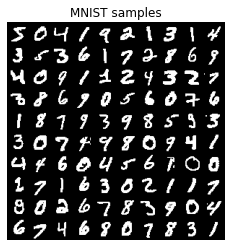

In [6]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
train_data = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
imgs = train_data.data[:100]
show_samples(imgs.reshape([100, 1, 28, 28]) * 255.0, title='MNIST samples')

### BiGAN

In this part, we'll train a BiGAN model on MNIST dataset. We train a generator that generates image $x$ from random noise $z \sim \mathcal{N}(0, 1)$ with $z \in \mathbb{R}^{50}$. Simultaneously, we train an encoder that inverts the generative mapping, $E: x \to z$.  

After training the BiGAN model, we'll use the encoder as a feature extractor for images. We use a linear classifier (a single fully connected layer) on top of the features to do the classification task. We'll compare the performances of a randomly initialized encoder and an encoder trained by BiGAN. 

We provide a training code template in **models/bigan_solver.py** and BiGAN model in **models/bigan_model.py**. Please follow the instructions and fill in the functions in **models/bigan_solver.py**. 

We provide the functions for plotting and visualizing images. **You'll provide the following results.**
- Record the BiGAN loss of the training data (per mini-batch) and testing data (per epoch).
- Sample 100 images using the trained model. 
- Show reconstruction image pairs using the trained BiGAN model. 
- Plot the training loss for the linear classifier (both the pretrained encoder and the randomly initialized encoder). 

In [7]:
from models.bigan_solver import train_bigan
gan_losses, samples, reconstructions, pretrained_losses, random_losses = train_bigan(train_data, test_data)
# torch.save(torch.Tensor(gan_losses), 'gan_losses.pth')
# torch.save(torch.Tensor(pretrained_losses), 'pretrained_losses.pth')
# torch.save(torch.Tensor(random_losses), 'random_losses.pth')
# torch.save(samples, 'samples.pth')
# torch.save(reconstructions, 'reconstructions.pth')


Final BiGAN test linear accuracy: 0.8587999939918518
Final random encoder test linear accuracy: 0.8014000058174133


In [9]:
# gan_losses = list(torch.load('gan_losses.pth').detach().numpy())
# pretrained_losses = list(torch.load('pretrained_losses.pth').detach().numpy())
# random_losses = list(torch.load('random_losses.pth').detach().numpy())
# samples = torch.load('samples.pth')
# reconstructions = torch.load('reconstructions.pth')

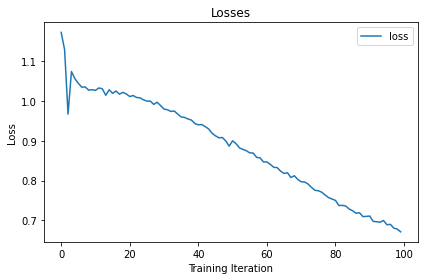

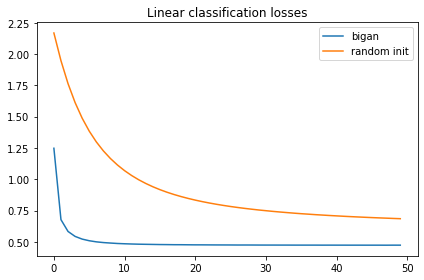

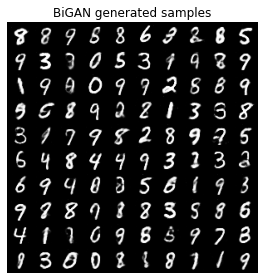

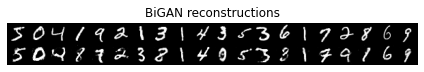

BiGAN final linear classification loss: 0.4732098959719957
Random encoder linear classification loss: 0.6847705173848281


In [8]:
from utils.vis import plot_gan_training, plot_supervised, show_samples

plot_gan_training(gan_losses, 'Losses', 'results/bigan_losses.png')
plot_supervised(pretrained_losses, random_losses, 'Linear classification losses', 'results/bigan_lc_losses.png')
show_samples(samples.transpose(0,3,1,2) * 255.0, fname='results/bigan_samples.png', title='BiGAN generated samples')
show_samples(reconstructions.transpose(0,3,1,2) * 255.0, nrow=20, fname='results/bigan_reconstructions.png', title='BiGAN reconstructions')
print('BiGAN final linear classification loss:', pretrained_losses[-1])
print('Random encoder linear classification loss:', random_losses[-1])